In [ ]:
#Author: Oğuzhan Öztürk to get contact: oguzhanozturk0@outlook.com


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

stop_words=nltk.corpus.stopwords.words('english')
new_stopwords = ['movie','movies','film','love','good','like','best','great','ring','shawshank','films','one','ive','watch','thing']
stop_words.extend(new_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('CSV FILE PATH', on_bad_lines='skip')
df=pd.DataFrame(data)
reviews=data[['review']]


def clean_text(review):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(review)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text


In [ ]:
data['review'] = data['review'].astype(str)
df['cleaned_review']=df['review'].apply(clean_text)


In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [ ]:
vect_text=vect.fit_transform(df['cleaned_review'])

In [ ]:
idf=vect.idf_

In [ ]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  6.818782932110698
Topic  1  :  -11.152881007642607
Topic  2  :  97.7665438324838
Topic  3  :  7.951990070028558
Topic  4  :  3.3971162622737783
Topic  5  :  0.4058740447531464
Topic  6  :  2.310563080374423
Topic  7  :  -1.3116623565065182
Topic  8  :  0.7332421024233052
Topic  9  :  -3.350065675950928


In [ ]:
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 1000)
[[ 6.36110193e-02  4.65299657e-03  4.35386923e-03 ...  7.48609429e-02
   4.78276327e-03  7.99288841e-03]
 [-4.86225004e-02 -2.80707313e-03 -2.62706699e-03 ...  1.09912446e-02
   1.25863041e-03 -1.77945310e-03]
 [-1.14607535e-02 -9.52149047e-05 -3.98918796e-04 ...  1.74713816e-03
   1.29301513e-04  8.48782746e-04]
 ...
 [ 9.19455629e-02  4.03503103e-03  9.89616444e-04 ...  1.00504236e-02
  -2.56534138e-03 -1.17597824e-03]
 [ 2.07105726e-01  2.46335974e-04 -8.67070766e-04 ...  5.95142745e-03
  -1.73667475e-03 -2.56564030e-03]
 [ 4.65269566e-02  4.06455576e-03  1.44769544e-03 ... -6.98760602e-03
  -1.18725926e-03  2.39238914e-03]]


In [ ]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
time story ever make would think really character still well 

Topic 1: 
time every favorite watched first long favourite biggest year waste 

Topic 2: 
going another change inmate arrival vastly time keep life world 

Topic 3: 
ever made seen greatest time watched going inmate arrival vastly 

Topic 4: 
story ever made amazing greatest also everything well life line 

Topic 5: 
would make recommend time think anyone give want really hour 

Topic 6: 
still would story better ever even life could never many 

Topic 7: 
still character really well life 10 amazing seen would think 

Topic 8: 
everything perfect 10 amazing still scene else masterpiece cinematography would 

Topic 9: 
life character well must even would every also real 10 



In [ ]:
from wordcloud import WordCloud

def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

perplexity_unigram = np.exp(-np.mean(np.log(np.maximum(lsa_top, 1e-10))))
#perplexity_bigram = np.exp(-np.mean(np.log(np.maximum(lsa_bigram, 1e-10))))



print("Unigram LSA Model Perplexity:", perplexity_unigram)
#print("Bigram LSA Model Perplexity:", perplexity_bigram)

Unigram LSA Model Perplexity: 3515311848.910174


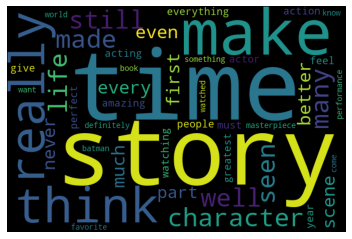

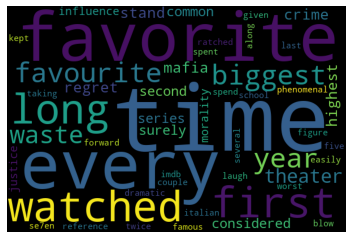

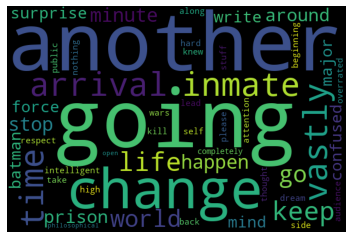

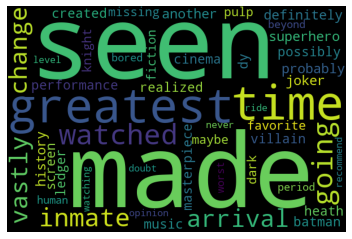

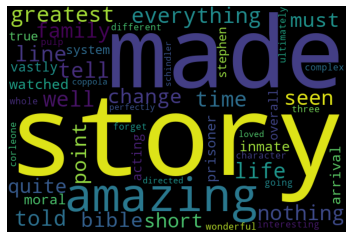

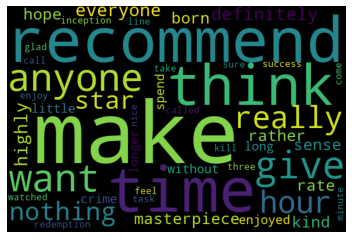

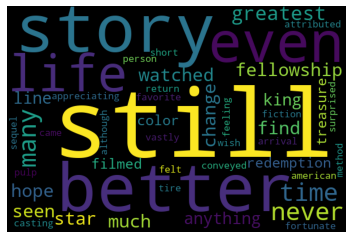

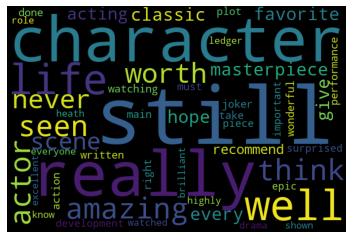

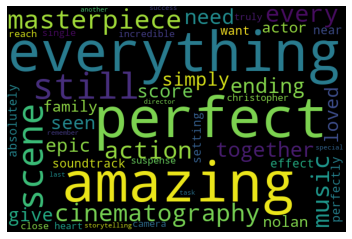

In [ ]:
for x in range(0, 9):
  draw_word_cloud(x)
